# Gradient Descent

Gradient Descent is an optimization algorithm [IBM: What is gradient descent? ](https://www.ibm.com/topics/gradient-descent) which is

   weight_i =  weight_i - learning_rate * d/d(weight_i)<br>
   y_hat = m*x_i+b<br>
   d/d(weight_i) = d(MSE)/d(weight_i)      -->   (2/n)*sum(-x_i*(y_i - m*x_i+b))<br>
   d/db = d(MSE)/db                        -->   (2/n)*sum(y_i - m*x_i+b)<br>
   MSE = (1/n) * sum((y_i - m*x_i+b)^2)<br>



<img src="gradient-descent.png" width="800" height="400">
Dhaval P.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/8_sgd_vs_gd/homeprices_banglore.csv?raw=true')

In [3]:
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [4]:
from sklearn import preprocessing

In [5]:
scale_x = preprocessing.MinMaxScaler()
scale_y = preprocessing.MinMaxScaler()

In [6]:
x_scaled = scale_x.fit_transform(df.drop('price',axis='columns'))
x_scaled

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [7]:
y_scaled = scale_y.fit_transform(df['price'].values.reshape(df.shape[0],1))
y_scaled

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [16]:
def batch_gradient_descent(x,y_true,epochs,learning_rate=0.01):
    number_of_features = x.shape[1]
    
    w = np.ones(shape=(number_of_features))
    b=0
    total_samples = x.shape[0]
    
    cost_list=[]
    epoch_list=[]
    for i in range(epochs):
        #y_pred = weighted sum
        y_pred = np.dot(w,x.T) + b
        
        w_grad = -(2/total_samples)*(x.T.dot(y_true-y_pred))
        b_grad = -(2/total_samples)*(np.sum(y_true-y_pred))
        
        w = w -learning_rate*w_grad
        b = b -learning_rate*b_grad
        
        cost = np.mean(np.square(y_true-y_pred))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list

In [17]:
w, b, cost, cost_list, epoch_list = batch_gradient_descent(x_scaled,y_scaled.reshape(y_scaled.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

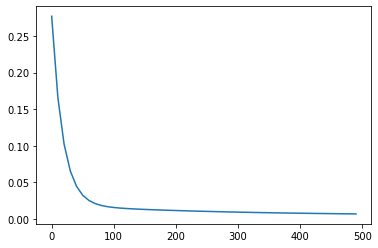

In [18]:
plt.plot(epoch_list,cost_list)
plt.show()

In [20]:
def predict(area,bedrooms,w,b):
    x_scaled = scale_x.transform([[area,bedrooms]])[0]
    price_scaled = w[0]*x_scaled[0] + w[1]*x_scaled[1] + b
    return scale_y.inverse_transform([[price_scaled]])

predict(2600,4,w,b)

C:\Users\pitz\Desktop\Com Phys\venv\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[128.45484403]])

In [21]:
import random

In [25]:
def stochastic_gradient_descent(x,y_true,epochs,learning_rate=0.01):
    number_of_features = x.shape[1]
    
    w = np.ones(shape=(number_of_features))
    b=0
    total_samples = x.shape[0]
    
    cost_list=[]
    epoch_list=[]
    for i in range(epochs):
        random_index = random.randint(0,total_samples-1)
        sample_x = x[random_index]
        sample_y = y_true[random_index]
        #y_pred = weighted sum
        y_pred = np.dot(w,sample_x.T) + b
        
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_pred))
        b_grad = -(2/total_samples)*(np.sum(sample_y-y_pred))
        
        w = w -learning_rate*w_grad
        b = b -learning_rate*b_grad
        
        cost = np.mean(np.square(sample_y-y_pred))
        
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list

In [28]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(x_scaled,y_scaled.reshape(y_scaled.shape[0],),10000)
w_sgd, b_sgd

(array([0.70534325, 0.67157354]), -0.22789622344455232)

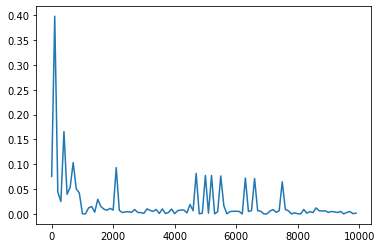

In [27]:
plt.plot(epoch_list_sgd,cost_list_sgd)
plt.show()

mini-batch = itermediate version of batch GD and stochastic GD

In [29]:
np.random.permutation([1,2,3,4])

array([2, 1, 3, 4])

In [30]:
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
        
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list